# Experiment TRIVIAL1 

Trivial case to give an intuition about true score and how it relates 
to human ratings: we show that as the number of raters increase, the mean H
approaches true score mean and the correlation 
with mean will approach the known correlation with true score. 
Yet the correlation against individual raters will vary. 

In [17]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

import json

In [40]:
config = json.load(open('settings.json'))
N_responses = config['N_responses']
N_raters = config['N_raters']
key_steps = config['key_steps']

In [41]:
df = pd.read_csv('../data/data.csv')

In [44]:
# compute the cumulative mean of human scores
human_columns = ['h_{}'.format(h) for h in range(1, N_raters+1)]
df_agg = df[human_columns].expanding(min_periods=1, axis=1).mean()

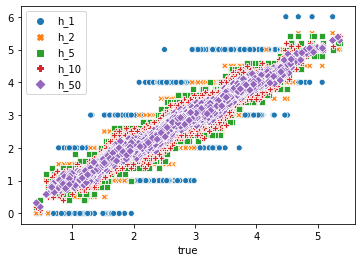

In [45]:
# plot mean scores against true scores for a few key points.
# We set the index to true scores to have them plotted as x-axis
df_agg.index = df['true']
sns.scatterplot(data=df_agg[['h_{}'.format(i) for i in key_steps]])

## Correlations

In [46]:
# baseline: system correlation with true score. 
df['system'] = df['sys_7']
true_corr = pearsonr(df['system'], df['true'])[0]
true_corr

0.8093209148854923

In [47]:
# correlations with individual raters
corrs_raters = df[human_columns].corrwith(df['system'])
corrs_raters.describe()

count    50.000000
mean      0.598933
std       0.124942
min       0.437146
25%       0.458286
50%       0.621517
75%       0.740981
max       0.746105
dtype: float64

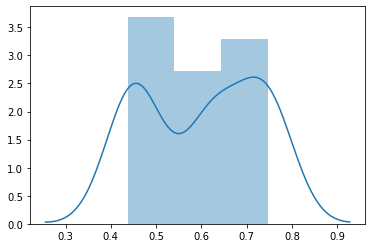

In [48]:
sns.distplot(corrs_raters)

In [49]:
# compute correlations with aggregated scores
df_agg.index=df.index
corrs_mean = df_agg.corrwith(df['system'])
corrs_mean.index=range(1, N_raters+1)

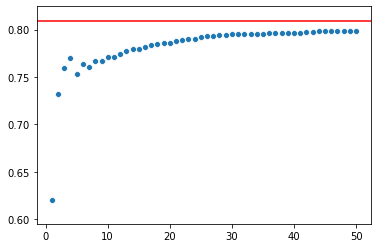

In [50]:
# plot correlations
ax = sns.scatterplot(data=corrs_mean)
ax.axhline(true_corr, color='red')

In [52]:
# print correlations for few key steps
df_corrs = pd.DataFrame(corrs_mean).transpose()
df_corrs['true'] = true_corr
df_corrs[key_steps + ['true']]

,1,2,5,10,50,true
0,0.620596,0.732055,0.753103,0.77152,0.798907,0.809321


## R2

We also consider R2, proportional reduction in MSE, because PRMSE is essentially this but against true scores. 

In [53]:
# baseline: system r2 with true score.
true_r2 = r2_score(df['true'], df['system'])
true_r2

0.4767431000540935

In [54]:
# r2 with individual raters
r2_raters = []
for h in human_columns:
    r2_raters.append(r2_score(df[h], df['system']))
r2_raters = pd.Series(r2_raters)
r2_raters.describe()

count    50.000000
mean      0.273685
std       0.108391
min       0.127907
25%       0.158920
50%       0.281406
75%       0.399200
max       0.410644
dtype: float64

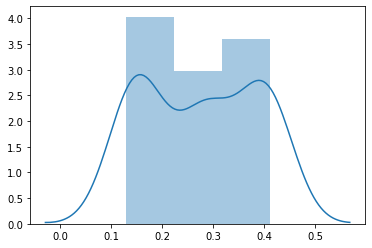

In [55]:
sns.distplot(r2_raters)

In [56]:
# compute r2 with aggregated scores
r2_mean = []
for h in human_columns:
    r2_mean.append(r2_score(df_agg[h], df['system']))
r2_mean = pd.Series(r2_mean)

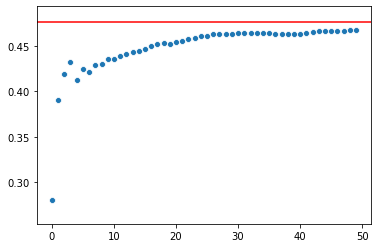

In [57]:
# plot r2
ax = sns.scatterplot(data=r2_mean)
ax.axhline(true_r2, color='red')

In [61]:
# print r2 for few key steps
df_r2 = pd.DataFrame(r2_mean).transpose()
df_r2.columns=range(1, N_raters+1)
df_r2['true'] = true_r2
df_r2[key_steps + ['true']]

,1,2,5,10,50,true
0,0.279941,0.390474,0.413027,0.436332,0.467702,0.476743
